# Business Hotel

## Import Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv("hotel.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [51]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Tipe data children, agent, company kurang tepat maka akan diganti kemudian.

## Data Pre-processing

In [52]:
# Check the null values before handling null values
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

kolom children, city, agent and company memiliki null values.

In [53]:
## Handling null values
df['children'] = df['children'].fillna(0)
df['city'] = df['city'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

children diisi nilai 0, city diisi dengan unknown, agent dan company diisi 0 yang diartikan sebagai private atau pribadi

In [54]:
# Check null values after handling null values
print(df['children'].isna().sum())
print(df['city'].isna().sum())
print(df['agent'].isna().sum())
print(df['company'].isna().sum())

0
0
0
0


In [55]:
# Fix the data type
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

In [56]:
# Fix incorrect value
# Replace 'Undefined' in 'meal' column with 'No Meal'
df['meal'] = df['meal'].replace(['Undefined'], 'No Meal')
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

In [57]:
# Membuat kolom baru bernama total_customer
df['total_customer'] = df['adults'] + df['children'] + df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_customer
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out,2
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out,2
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,0,0,0,Personal,75.0,0,0,Check-Out,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304,0,0,Personal,75.0,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out,2


In [58]:
# Melihat nilai unik dari total_customer
df['total_customer'].unique()

array([ 2,  1,  3,  4,  5, 12, 40, 26, 50, 27, 55,  0, 20,  6, 10])

In [59]:
# Membuang nilai 0 pada kolom total_customer
df.drop(df[df['total_customer'] == 0].index, inplace = True)

In [60]:
df['total_customer'].unique()

array([ 2,  1,  3,  4,  5, 12, 40, 26, 50, 27, 55, 20,  6, 10])

## Monthly Hotel Booking Analysis Based on Hotel Type

In [61]:
df2 = df.copy()
df2 = df.groupby(['hotel','arrival_date_year','arrival_date_month']).agg({'total_customer' : 'count'}).reset_index()
df2.columns = ['hotel','year','month','total_bookings'] # Count total bookings in every month

df2 = df2.groupby(['hotel','month']).agg({'total_bookings' : 'mean'}).reset_index() # Calculate the average bookings
df2.columns = ['hotel','month','avg_bookings'] #Change total_bookings column name into avg_bookings
df2 = df2.reindex([4,3,7,0,8,6,5,1,11,10,9,2,16,15,19,12,20,18,17,13,23,22,21,14]).reset_index() #rearrange dataframe index to order the data by month
df2 = df2.drop(columns=['index'], axis = 1) #drop index column
df2.head()

,hotel,month,avg_bookings
0,City Hotel,January,2168.0
1,City Hotel,February,2057.0
2,City Hotel,March,1865.0
3,City Hotel,April,2475.0
4,City Hotel,May,3217.0


Text(0.5, 1.0, 'Annual Average Booking')

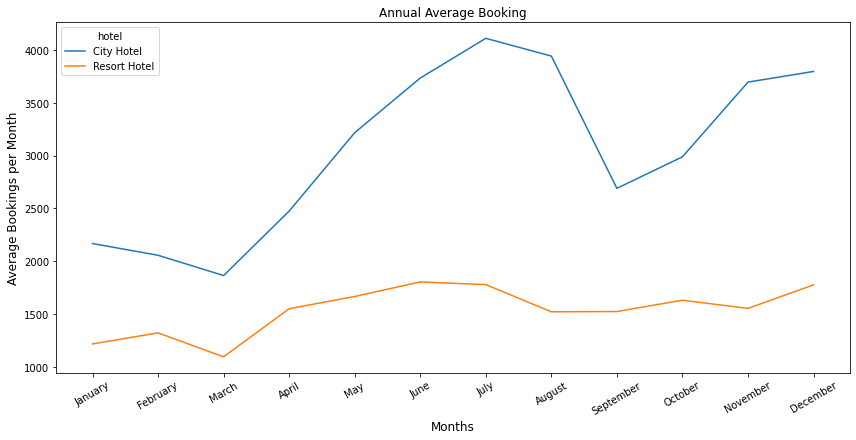

In [62]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='avg_bookings', data=df2, hue='hotel')
plt.ylabel("Average Bookings per Month", fontsize = 12)
plt.xlabel("Months", fontsize = 12)
p = plt.xticks(rotation=30)
plt.tight_layout()
plt.title('Annual Average Booking') 

### Insight
Berdasarkan grafik di atas, kita dapat mengambil kesimpulan bahwa peak season terjadi pada pertengahan dan akhir tahun yang merupakan hari libur nasional. Setelah melewati peak season, booking hotel mengalami penurunan yang diakibatkan berakhirnya masa libur nasional tersebut. Kategori hotel yang menjadi primadona customer yaitu city hotel pada setiap bulannya. Untuk mengantisipasi hal yang tidak diinginkan, pihak manajemen hotel harus selalu siap menghadapi hari libur nasional, karena jumlah pemesanan dapat dipastikan meningkat. Pada hari diluar libur nasional, manajemen dapat memberikan promo menarik agar booking rate tetap terjaga.





## Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [63]:
df3 = df.copy()
# define stay duration
df3['days_stayed'] = df3.stays_in_weekend_nights + df3.stays_in_weekdays_nights

In [64]:
#Grouping by hotel, aggregate sum and count is_canceled column to get percentage
df3 = df3.groupby(['hotel','days_stayed']).agg({'is_canceled' : ['sum','count']}).reset_index()
df3.columns = ['hotel','days_stayed','sum_canceled','n_canceled'] #Change column name

In [65]:
#Make a day_stayed_group column
df3['day_stayed_group'] = np.where(df3['days_stayed'] > 21, '>21',
                                          np.where (df3['days_stayed'] >= 15, '15-20', df3['days_stayed']))
df3.sample(10)#Make a day_stayed_group column
df3['day_stayed_group'] = np.where(df3['days_stayed'] > 21, '>21',
                                          np.where (df3['days_stayed'] >= 15, '15-20', df3['days_stayed']))
df3.sample(10)

,hotel,days_stayed,sum_canceled,n_canceled,day_stayed_group
19,City Hotel,19,10,12,15-20
55,Resort Hotel,21,26,61,15-20
40,Resort Hotel,6,592,1797,6
3,City Hotel,3,9482,21371,3
60,Resort Hotel,27,1,1,>21
52,Resort Hotel,18,23,28,15-20
34,Resort Hotel,0,10,381,0
70,Resort Hotel,56,1,2,>21
49,Resort Hotel,15,10,33,15-20
14,City Hotel,14,71,97,14


In [66]:
#Grouping by hotel and day_stayed_group, and aggregate by sum sum_canceled and n_canceled 
df3 = df3.groupby(['hotel','day_stayed_group']).agg({'sum_canceled' : 'sum',
                                                                     'n_canceled' : 'sum'}).reset_index()

In [67]:
#Change column name
df3.columns = ['hotel','days_stayed_group','sum_canceled','n_canceled']

#Calculate canceled percentage
df3['canceled_pct'] = df3['sum_canceled'] / df3['n_canceled'] * 100

#Show dataset
df3

,hotel,days_stayed_group,sum_canceled,n_canceled,canceled_pct
0,City Hotel,0,13,264,4.924242
1,City Hotel,1,4103,13258,30.947353
2,City Hotel,10,116,196,59.183673
3,City Hotel,11,46,79,58.227848
4,City Hotel,12,30,63,47.619048
5,City Hotel,13,26,41,63.414634
6,City Hotel,14,71,97,73.195876
7,City Hotel,15-20,76,105,72.380952
8,City Hotel,2,10432,21415,48.713519
9,City Hotel,3,9482,21371,44.368537


In [68]:
#Rearrange dataframe index to order the data by month
df3 = df3.reindex([0,1,8,9,10,11,12,13,14,15,2,3,4,5,6,7,16,17,18,
                                 25,26,27,28,29,30,31,32,19,20,21,22,23,24,33]).reset_index()
df3 = df3.drop(columns=['index'], axis = 1) #Delete index column
df3.head()

,hotel,days_stayed_group,sum_canceled,n_canceled,canceled_pct
0,City Hotel,0,13,264,4.924242
1,City Hotel,1,4103,13258,30.947353
2,City Hotel,2,10432,21415,48.713519
3,City Hotel,3,9482,21371,44.368537
4,City Hotel,4,4853,12547,38.678569


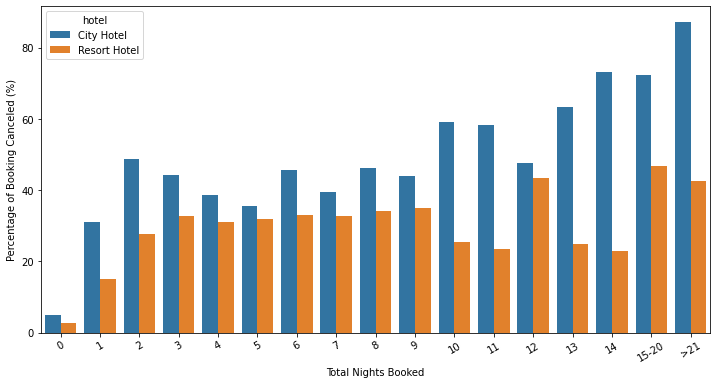

In [69]:
plt.figure(figsize=(12,6))
sns.barplot(x='days_stayed_group', y='canceled_pct', hue='hotel', data=df3)
plt.ylabel("Percentage of Booking Canceled (%)")
plt.xlabel("Total Nights Booked")
p = plt.xticks(rotation=30)

### Insight

Berdasarkan grafik di atas, dapat kita lihat bahwa terdapat fluktuasi tingkat pembatalan terhadap durasi menginap. Korelasi di atas cenderung kuat antara durasi menginap dengan tingkat pembatalan pemesanan hotel. Semakin lama durasi menginap, maka tingkat pembatalan cenderung meningkat pula. Kesimpulan dini dapat diartikan bahwa konsumen ragu jika menginap di satu tempat dalam jangka waktu lama, apakah mereka akan betah atau tidak. Keputusan konsumen membatalkan menginap masih harus dilakukan pengujian lebih lanjut apakah benar dugaan di atas atau karena faktor lain. Pihak manajemen dapat membuat kebijakan agar dapat mengurangi faktor penyebab pembatalan tanpa mengurangi kualitas layanan.

## Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [70]:
df4 = df.copy()

In [71]:
df4['lead_time']

0         342
1         737
2           7
3          13
4          14
         ... 
119385     23
119386    102
119387     34
119388    109
119389    205
Name: lead_time, Length: 119210, dtype: int64

In [72]:
# Menyederhanakan kolom lead time
df4['lead_times'] = np.where(df4['lead_time'] > 400, 401, df4['lead_time']) # kategorisasi menjadi satu group
bins = list(np.arange(0,max(df4['lead_times'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df4['lead_time_group'] = pd.cut(df4['lead_times'],bins=bins, include_lowest=True, labels=labels) # groupping lead_time untuk setiap kelipatan 30

In [73]:
df4_book = df4.groupby(['hotel', 'lead_time_group', 'is_canceled'])['hotel'].count().reset_index(name='num_bookings')
df4_pivot = df4_book.pivot_table(index=['hotel', 'lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()
df4_pivot.columns = ['hotel_type', 'lead_time_group', 'not_canceled', 'canceled']
df4_pivot['all_bookings'] = df4_pivot['not_canceled']+df4_pivot['canceled']
df4_pivot['pct_canceled'] = df4_pivot['canceled']*100.0/(df4_pivot['all_bookings'])

In [74]:
df4_pivot.head()

,hotel_type,lead_time_group,not_canceled,canceled,all_bookings,pct_canceled
0,City Hotel,0-30,18060,5184,23244,22.302530
1,City Hotel,30-60,7266,4608,11874,38.807479
2,City Hotel,60-90,5210,3692,8902,41.473826
3,City Hotel,90-120,3956,3486,7442,46.842247
4,City Hotel,120-150,3064,2542,5606,45.344274


Text(0, 0.5, 'Percentage of Booking Canceled (%)')

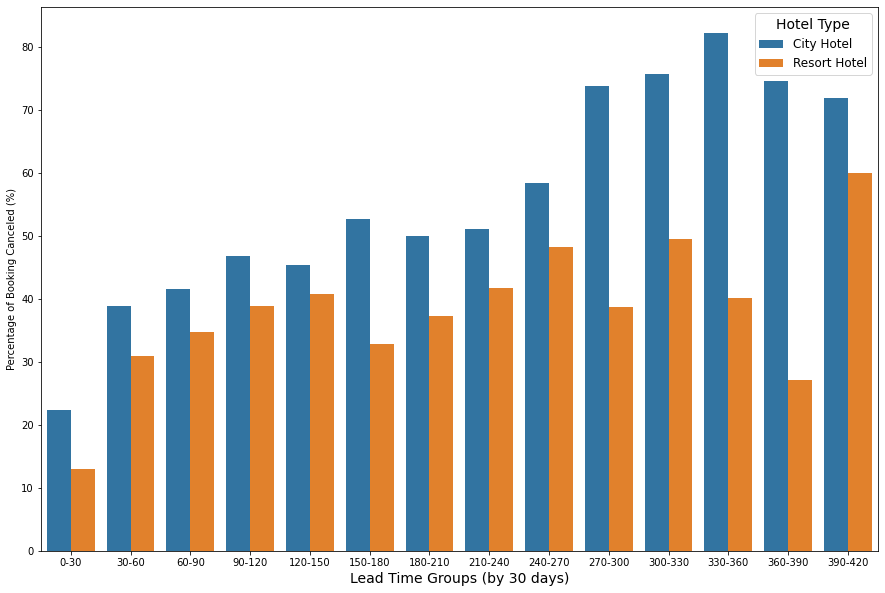

In [76]:
plt.figure(figsize=(15,10))
sns.barplot(x='lead_time_group', y='pct_canceled', hue='hotel_type', data=df4_pivot)

plt.legend(title='Hotel Type', title_fontsize=14, prop={'size':12})
plt.xlabel('Lead Time Groups (by 30 days)', fontsize=14)
plt.ylabel('Percentage of Booking Canceled (%)')

### Insight

Berdasarkan grafik di atas, dapat kita lihat bahwa terdapat fluktuasi tingkat pembatalan terhadap lama waktu tunggu. Korelasi di atas cenderung kuat antara lama waktu tunggu dengan tingkat pembatalan pemesanan hotel. Semakin lama durasi waktu tunggu, maka tingkat pembatalan cenderung meningkat pula. Kesimpulan sementara dapat diartikan bahwa konsumen tidak ingin menunggu terlalu lama dalam memesan hotel dan mungkin lebih memilih hotel lain yang dapat dipesan dalam waktu dekat. Keputusan konsumen membatalkan menginap masih harus dilakukan pengujian lebih lanjut apakah benar dugaan di atas atau karena faktor lain. Pihak manajemen dapat membuat kebijakan agar waktu tunggu menjadi lebih singkat tanpa mengurangi kualitas layanan. 